# Tesla (TSLA) Data Analysis

In this analysis, we will be studying and analyzing the tesla stock. Tesla is an equity market and does not have stock options. Tesla is an auto company founded by Elon Musk, Tesla has had its own struggles, but suddenly managed to overcome their market devaluation. Furthermore, Data visualization will be outputted as well as predicting the stock price a year from now. Fbprophet will be utilized for the purposes of this analysis.

The stock market exchange we know today is maintained by hedge funds where investors would flood the market with capital in order to keep a company afloat. As I go through each method of analysis, this will be known that the markets are unpredictable to tell if a capital gain would occur or vice versa. Data analysis is vital because investors need data before executing a sell or buy. 


# Dependency Check

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Importing the csv file to be used as the dataset

In [2]:
tsla = pd.read_csv('Datasets/TSLA.csv')
tsla

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-06-03,248.199997,250.720001,247.009995,248.990005,248.990005,1781500
1,2015-06-04,247.500000,249.300003,245.710007,245.919998,245.919998,2453600
2,2015-06-05,246.000000,249.699997,245.679993,249.139999,249.139999,3022000
3,2015-06-08,250.850006,258.750000,250.309998,256.290009,256.290009,5017000
4,2015-06-09,255.399994,257.739990,254.139999,256.000000,256.000000,2611100
...,...,...,...,...,...,...,...
1233,2020-04-27,737.609985,799.489990,735.000000,798.750000,798.750000,20681400
1234,2020-04-28,795.640015,805.000000,756.690002,769.119995,769.119995,15222000
1235,2020-04-29,790.169983,803.200012,783.159973,800.510010,800.510010,16216000
1236,2020-04-30,855.190002,869.820007,763.500000,781.880005,781.880005,28471900


In [4]:
single_column = tsla[{'Date','Close'}]
single_column

,Date,Close
0,2015-06-03,248.990005
1,2015-06-04,245.919998
2,2015-06-05,249.139999
3,2015-06-08,256.290009
4,2015-06-09,256.000000
...,...,...
1233,2020-04-27,798.750000
1234,2020-04-28,769.119995
1235,2020-04-29,800.510010
1236,2020-04-30,781.880005


Above shows the Dates and historical closing price

# Data Visualization 

Graphing Historical Dataset

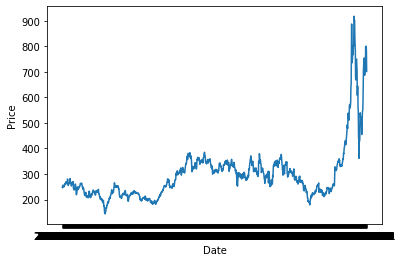

In [5]:
plt.plot(tsla.Date,tsla.Close)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

# Predicting TSLA Closing Price

The Dataset will be predicted utilizing the historical dataset derived from Yahoo Finance

In [7]:
import fbprophet

In [9]:
t = fbprophet.Prophet()

In [16]:
df = tsla
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-06-03,248.199997,250.720001,247.009995,248.990005,248.990005,1781500
1,2015-06-04,247.500000,249.300003,245.710007,245.919998,245.919998,2453600
2,2015-06-05,246.000000,249.699997,245.679993,249.139999,249.139999,3022000
3,2015-06-08,250.850006,258.750000,250.309998,256.290009,256.290009,5017000
4,2015-06-09,255.399994,257.739990,254.139999,256.000000,256.000000,2611100
...,...,...,...,...,...,...,...
1233,2020-04-27,737.609985,799.489990,735.000000,798.750000,798.750000,20681400
1234,2020-04-28,795.640015,805.000000,756.690002,769.119995,769.119995,15222000
1235,2020-04-29,790.169983,803.200012,783.159973,800.510010,800.510010,16216000
1236,2020-04-30,855.190002,869.820007,763.500000,781.880005,781.880005,28471900


In [17]:
df[['ds','y']] = df[['Date','Close']]
df = df[['ds','y']]
df.head()

,ds,y
0,2015-06-03,248.990005
1,2015-06-04,245.919998
2,2015-06-05,249.139999
3,2015-06-08,256.290009
4,2015-06-09,256.000000


In [18]:
t.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [19]:
predict = t.make_future_dataframe(periods=365)
predict.tail()

,ds
1598,2021-04-27
1599,2021-04-28
1600,2021-04-29
1601,2021-04-30
1602,2021-05-01


Below shows the Prediction of the dataset

In [20]:
predict = t.predict(predict)
predict.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1598,2021-04-27,1078.333470,949.037402,1312.460214,910.893232,1240.675143,53.412746,53.412746,53.412746,5.989494,5.989494,5.989494,47.423253,47.423253,47.423253,0.0,0.0,0.0,1131.746216
1599,2021-04-28,1079.595151,943.901455,1300.411674,911.475268,1243.061843,52.354493,52.354493,52.354493,6.245230,6.245230,6.245230,46.109263,46.109263,46.109263,0.0,0.0,0.0,1131.949644
1600,2021-04-29,1080.856832,947.149261,1299.034223,912.057305,1245.462295,49.795488,49.795488,49.795488,5.248462,5.248462,5.248462,44.547026,44.547026,44.547026,0.0,0.0,0.0,1130.652320
1601,2021-04-30,1082.118514,942.483145,1305.392153,912.450809,1247.935971,46.715890,46.715890,46.715890,3.960875,3.960875,3.960875,42.755015,42.755015,42.755015,0.0,0.0,0.0,1128.834404
1602,2021-05-01,1083.380195,926.230244,1280.999818,912.745276,1249.243543,27.455721,27.455721,27.455721,-13.298197,-13.298197,-13.298197,40.753918,40.753918,40.753918,0.0,0.0,0.0,1110.835916


# Prediction Visualization 

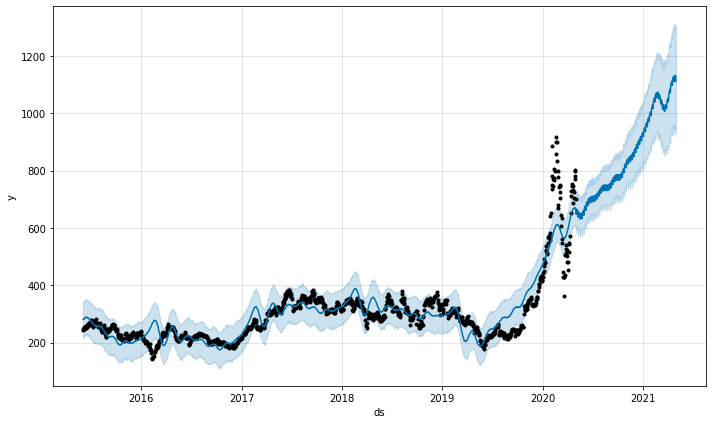

In [21]:
t.plot(predict);

Based on the Given Prediction graph above, we can say that one year from now, Tesla would be valued $1,100/share. That seems to be a huge gain. There can be many factors to why such a gain, we can say it can be from new product announcements, business decision, or flood of hedge funds funneled into the company. This trend would be on track to become a profitable company. Tesla is an equity where they do not offer stock options. Tesla has debt, so they use this equity until they can pay off its debt they owed. Overall, The comapny has its potential to become a force in the auto industry competing with General Motors (GM) and other well-known auto companies. 

Below, we have seasonality for trend, weekly, and yearly. These ranges will be discussed and based on its analysis and historical concept, will state whether the stock is worth investing in the stock market. 

- Trend: Given the trend, Tesla is predicted to gain a market value of $1,100/share by 2021 if, assuming that the economic conditions return to normal since the economy suffered a crash during the pandemic. By analyzing this trend, Tesla, as stated above has equity, and no stock options. Tesla has debt that needs to be paid off. Equity is given to its stakeholders until any debt and liability is paid off. To put it in simple terms: The stockholder's equity is the total amount of assets that the investors will own once debts and any liabilities are settled.

- Weekly: Based on the weekly prediction, we can see that the weekly gains would be upward and that trend will keep going further until it goes steady at about 5% or less, and by that time those weekly gain percentages will drop to an astounding -10%. Furthermore, Tesla has its history of problems. They started when they entered the stock market with a low market value, however, they rebounded with news and product announcements. Overall, this prediction is possible, but not certian. 

- Yearly: Based on the yearly prediction analysis, we can say that the stock yearly gain starts out at 60%, then the flucuation begins at the month of March 1st until November 1st, the prediction states that they will get back in the upward trend by January 1st. This prediction shows that it has the possibility for a loss of gains leading up to 2021. Overall, this prediction is possible, but its not certian. 

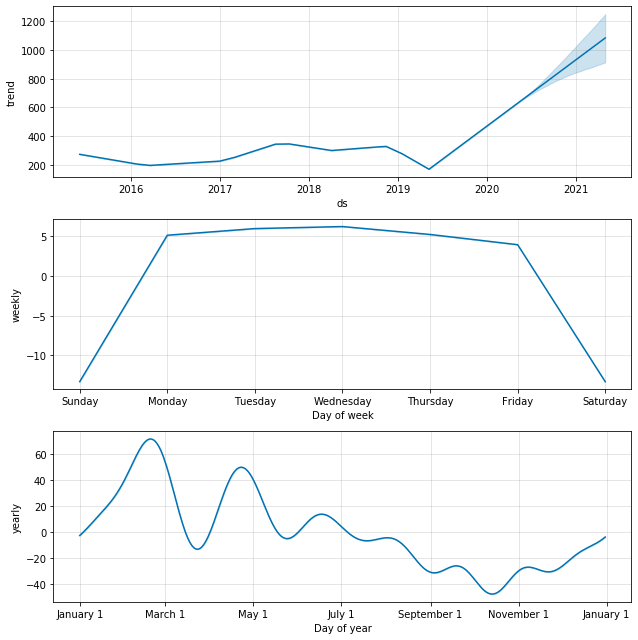

In [23]:
t.plot_components(predict);

# Conclusion

Based on the analysis and study of Tesla, I would say it is worth investing because it produces its vehicles faster, it is the largest electric vehicle in the world, it is worth it for long-term investing. However, they may sound promising, Tesla has its flaws, but they are a high risk investment. Tesla is still a viable option to those who want to put their funds into an auto company like Tesla. Tesla is listed on the NASDAQ Exchange and has a equity. Tesla has debt that needs to be paid off as well as any liabilites. This has shown its possibility to create an predictive analysis of the data as well as the outputted graph. Overall, to conclude I would definetly see Tesla keep going in an upward trend where investors want to put their funds into long-term investment. Tesla is great, but again, it is considered an high risk investment where they can come up with a huge drop and can potentially wipe out their gains. 